# Capstone Project: Online Retail Customer Segmentation

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
file_path= r"C:\IOD\DATA\OnlineRetail.csv"
df =pd.read_csv(file_path, encoding='ISO-8859-1')


## Data Cleaning & Exploratory Data Analysis

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Datasest Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
# Statistical summary of the dataset
df.describe()
# minus value= order cancelled?
# Max value too high? possibility of outliers

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
# Now looking at objects
df.describe(exclude= "number")

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


The dataset contains 541,909 total transactions, with 25,900 unique invoice numbers. This suggests multiple product purchases per invoice, as expected in retail transactions. The most frequently purchased product, 85123A, has 2,313 entries, corresponding to the description "WHITE HANGING HEART T-LIGHT HOLDER", which appears 2,369 times, reflecting some minor inconsistencies in product descriptions. The business operates across 38 countries, but the vast majority of transactions (495,478 entries) are from the United Kingdom.

## Missing Value

In [13]:
df.isnull().sum()
# high number of null value of customer ID may be due to orders from non-members.
df.isnull().mean()* 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

<Axes: >

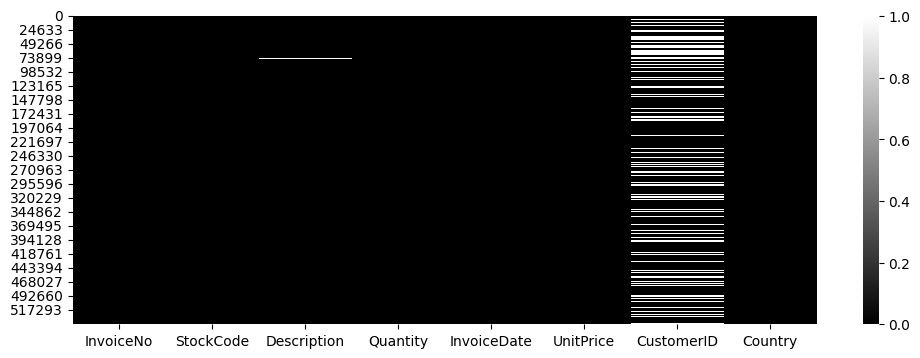

In [14]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), cmap='gray')

High number of null vlaues for customer ID. 24.93% of items purchased are not assigned to any customer. Therefore there is no sue of having the data with no customer assignment. since we can't form a cluster without customer ID. So I will drop them.
There are lot of non-members who are making online orders. Business should find ways to encourage non-members to sign up (e.g. give promotions or discount vouchers)

In [16]:
# Create a copy of the original dataframe
df= df.copy()

In [17]:
# Drop all rows with missing values in customerID column.
df.dropna(subset= ['CustomerID'], how='all', inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Duplicate Values

In [19]:
df.duplicated().sum()


5225

In [20]:
df.drop_duplicates(inplace= True)
df.duplicated().sum()

0

In [21]:
df.shape

(401604, 8)

## Exploratory Data Analysis

In [23]:
df['Country'].nunique()

37

### Top 5 Countries

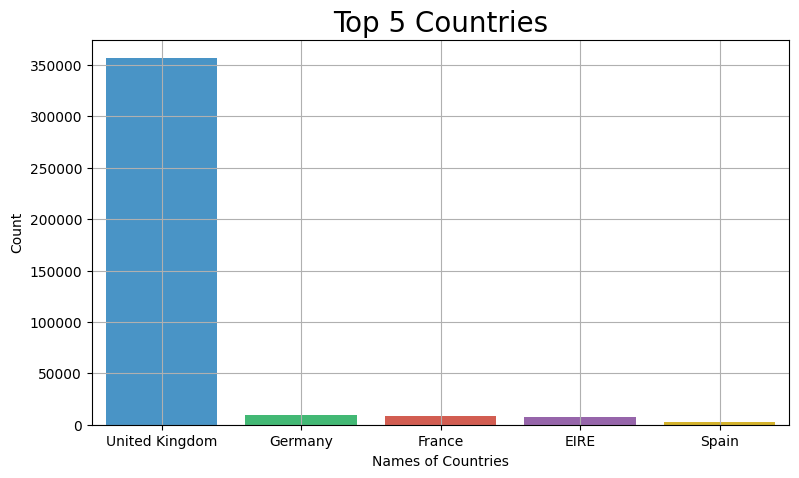

In [25]:
top_5_countries = df['Country'].value_counts().head(5)

plt.figure(figsize=(9, 5))
sns.barplot(x=top_5_countries.index, y=top_5_countries.values, palette=["#3498db", "#2ecc71", "#e74c3c", "#9b59b6", "#f1c40f"])
plt.title('Top 5 Countries', fontsize=20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Out of 37 different countries, majority of the online orders are from UK. 

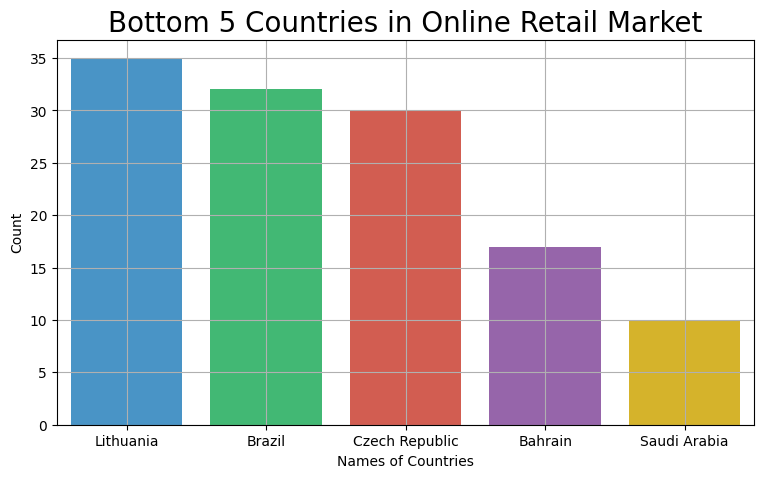

In [27]:
bottom_5_countries = df['Country'].value_counts().tail(5)

plt.figure(figsize=(9, 5))
sns.barplot(x=bottom_5_countries.index, y=bottom_5_countries.values, palette=["#3498db", "#2ecc71", "#e74c3c", "#9b59b6", "#f1c40f"])
plt.title('Bottom 5 Countries in Online Retail Market', fontsize=20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## Summary of Statistics

In [29]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


minus value, possibility of cancelled orders? or returned items
Max value is too high, possibility of outliers

In [31]:
df.describe(exclude= "number")

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,401604,401604,401604,401604,401604
unique,22190,3684,3896,20460,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,11/14/2011 15:27,United Kingdom
freq,542,2065,2058,543,356728


The dataset contains 401,604 total transactions, with 22,190 unique invoice numbers. This suggests multiple product purchases per invoice, as expected in retail transactions.

In [33]:
# Cancelled Orders
cancel= df[df['InvoiceNo'].astype(str).str.contains('C')]
cancel.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


Invoice number starting with C indicates it's a cancelled order. Invoice no with letter 'C' show quantity of negative value as well. 

In [35]:
# remove cancelled orders
df= df[~df['InvoiceNo'].astype(str).str.contains('C')]
df.shape

(392732, 8)

In [36]:
# Create a new column 'TotalCost'
df['Total_Cost'] = df['Quantity'] * df['UnitPrice']


In [37]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Cost
503377,578925,22585,PACK OF 6 BIRDY GIFT TAGS,12,11/27/2011 12:13,1.25,17365.0,United Kingdom,15.00
510442,579456,22676,FRENCH BLUE METAL DOOR SIGN 1,1,11/29/2011 14:20,1.25,13428.0,United Kingdom,1.25
157166,550193,84905,PINK BUTTERFLY CUSHION COVER,8,4/15/2011 9:27,4.95,13952.0,United Kingdom,39.60
406435,571779,22141,CHRISTMAS CRAFT TREE TOP ANGEL,4,10/19/2011 11:27,2.10,12748.0,United Kingdom,8.40
316186,564749,22556,PLASTERS IN TIN CIRCUS PARADE,12,8/30/2011 8:15,1.65,12708.0,Germany,19.80


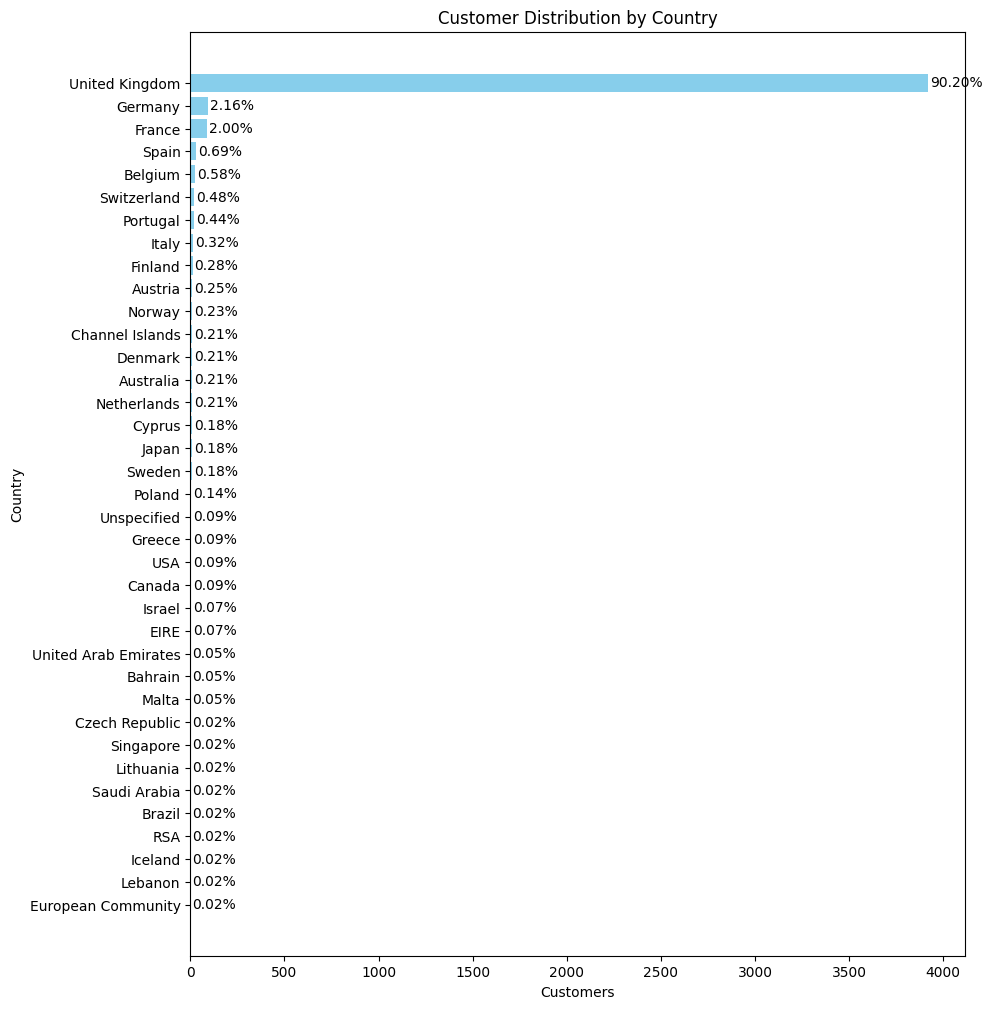

In [38]:
# Calculate unique customer counts per country
country_counts = df.groupby("Country")["CustomerID"].nunique().reset_index()
country_counts.columns = ["Country", "CustomerCount"]

# Calculate total customers for percentage calculation
total_customers = country_counts["CustomerCount"].sum()

# Calculate percentage and add to DataFrame
country_counts["Percentage"] = (country_counts["CustomerCount"] / total_customers) * 100

# Sort data for better visualization
country_counts = country_counts.sort_values(by="CustomerCount", ascending=True)

# Plot the bar chart with percentage labels
plt.figure(figsize=(10, 12))
bars = plt.barh(country_counts["Country"], country_counts["CustomerCount"], color='skyblue')
plt.xlabel("Customers")
plt.ylabel("Country")
plt.title("Customer Distribution by Country")

# Adding percentage labels next to the bars
for bar, percentage in zip(bars, country_counts["Percentage"]):
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height() / 2,
             f"{percentage:.2f}%", va='center')

plt.show()

The United Kingdom has a disproportionately large share of customers (90.20%) compared to other countries, indicating that the majority of the customer base is concentrated there.

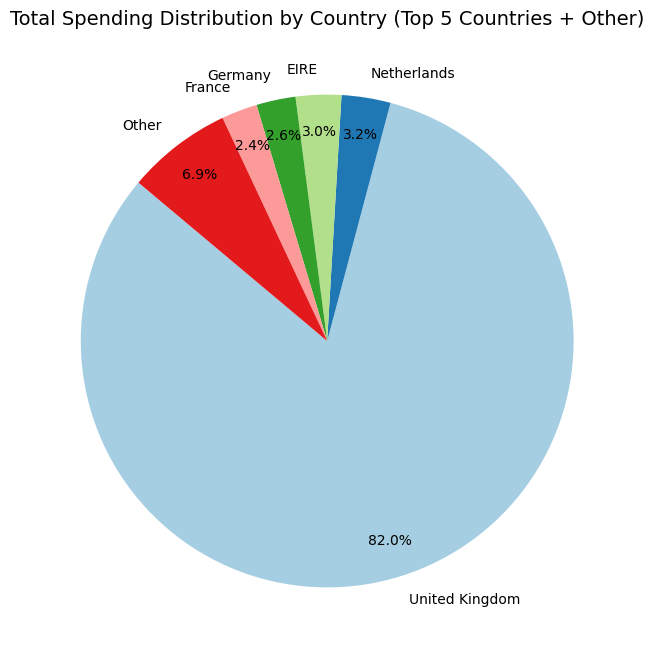

In [193]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data: replace with your actual DataFrame
# df = pd.DataFrame({'Country': ['UK', 'Germany', 'France', 'Spain', 'Italy', 'USA', ...], 'Total_Cost': [...]})

# Aggregate total spending by country
country_spending = df.groupby("Country")["Total_Cost"].sum().reset_index()
country_spending = country_spending.sort_values(by="Total_Cost", ascending=False)

# Select the top 5 countries
top_countries = 5
top_spending = country_spending[:top_countries]
other_spending = pd.DataFrame({'Country': ['Other'], 'Total_Cost': [country_spending[top_countries:]["Total_Cost"].sum()]})

# Concatenate the top spending and other spending data
top_spending = pd.concat([top_spending, other_spending], ignore_index=True)

# Plot pie chart with labels outside
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    top_spending["Total_Cost"], 
    labels=top_spending["Country"], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors,
    pctdistance=0.85,  # Distance of percentage labels from the center
    labeldistance=1.1  # Distance of country labels from the center
)

# Adjust label font size for readability
for text in texts:
    text.set_fontsize(10)  # Label font size

for autotext in autotexts:
    autotext.set_fontsize(10)  # Percentage font size

plt.title("Total Spending Distribution by Country (Top 5 Countries + Other)", fontsize=14)
plt.show()


Similarly, the UK accounts for the majority of total spending, underscoring its importance as the primary revenue source.

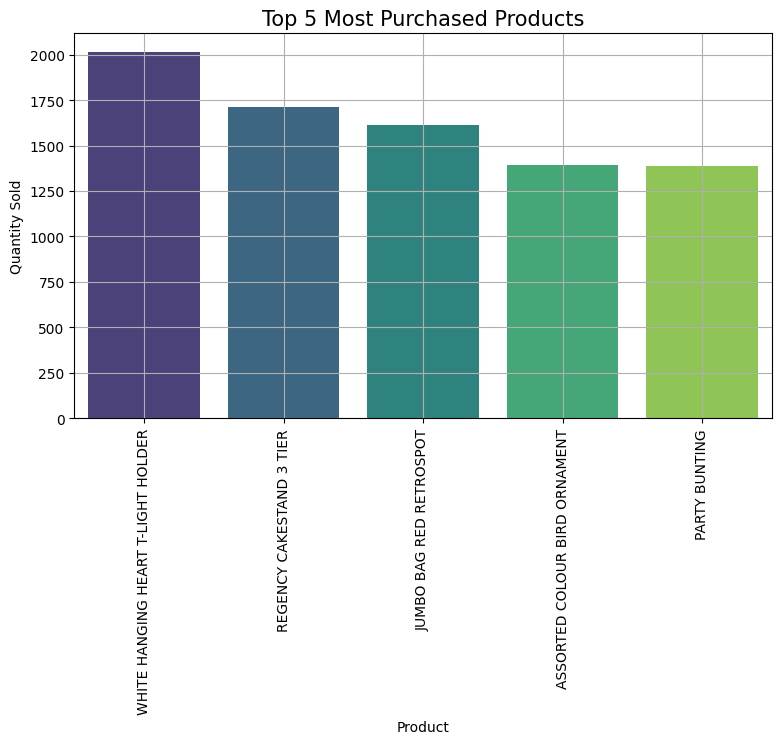

In [42]:
# Top 5 most purchased Products
most_selling = df.groupby('Description')['Quantity'].count().sort_values(ascending=False)[:5]

plt.figure(figsize=(9,5))
sns.barplot(x=most_selling.index, y=most_selling.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Top 5 Most Purchased Products", size=15)
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

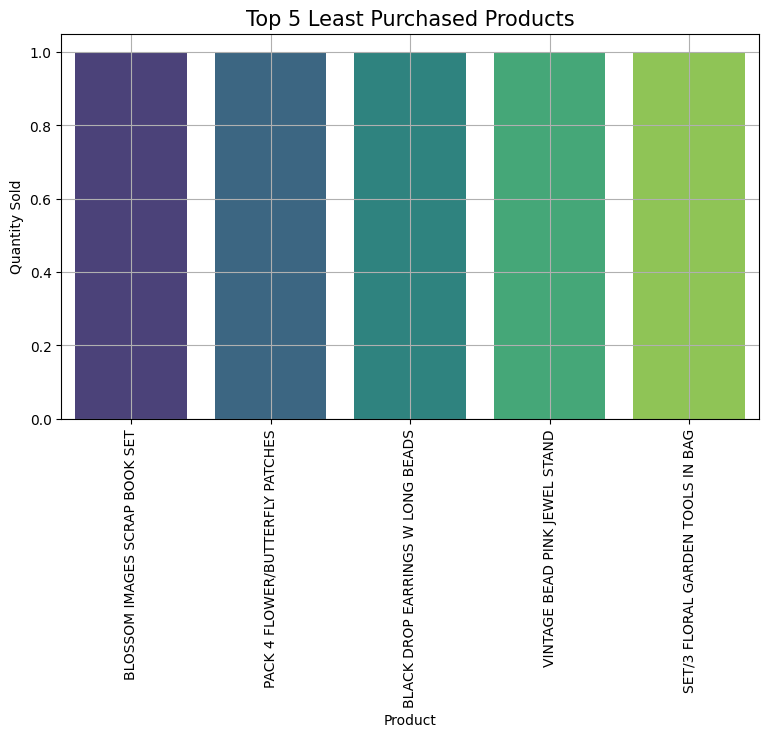

In [43]:
# Top 5 least purchased products
least_selling = df.groupby('Description')['Quantity'].sum().sort_values(ascending=True)[:5]

plt.figure(figsize=(9,5))
sns.barplot(x=least_selling.index, y=least_selling.values, palette="viridis")
plt.title("Top 5 Least Purchased Products", size=15)
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


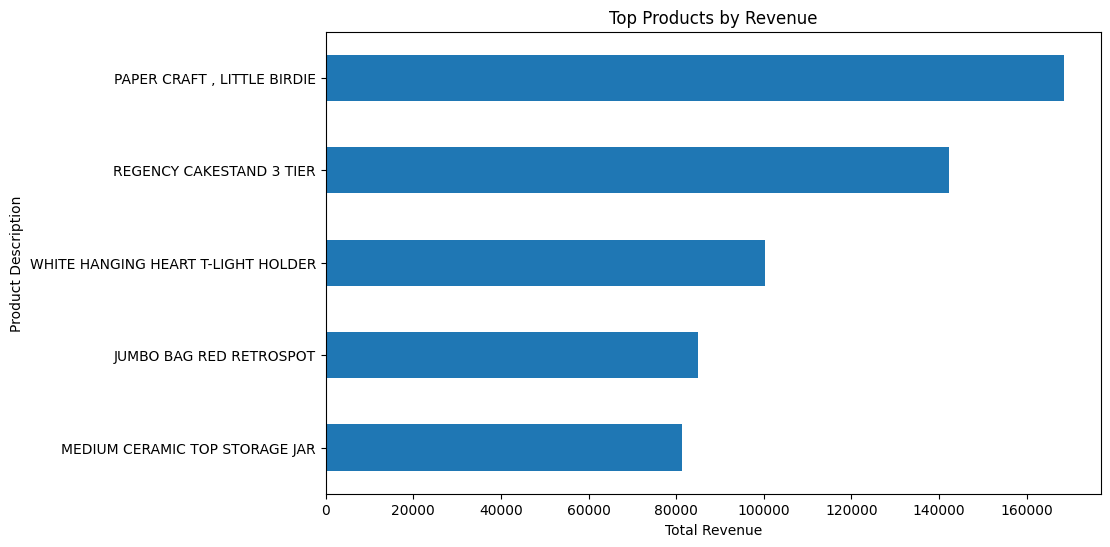

In [44]:
# Group by Description and sum Total_Cost for each product
product_revenue = df.groupby('Description')['Total_Cost'].sum().sort_values(ascending=False)

# Get the top N products by revenue, e.g., top 5
top_products = product_revenue.head(5)

# Plot the top products by revenue
plt.figure(figsize=(10, 6))
top_products.plot(kind='barh')
plt.title('Top Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Description')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [45]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["InvoiceDate"]

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 392732, dtype: datetime64[ns]

In [46]:
#
df["InvoiceMonth"]= df["InvoiceDate"].dt.month
df["InvoiceDay"]= df["InvoiceDate"].dt.day
df["InvoiceDow"]= df["InvoiceDate"].dt.dayofweek
df["InvoiceYM"] = df["InvoiceDate"].astype(str).str[:7]
df["InvoiceTime"]= df["InvoiceDate"].dt.time
df["InvoiceHour"]= df["InvoiceDate"].dt.hour
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Cost,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceYM,InvoiceTime,InvoiceHour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,1,2,2010-12,08:26:00,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,2,2010-12,08:26:00,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,1,2,2010-12,08:26:00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,2,2010-12,08:26:00,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,2,2010-12,08:26:00,8


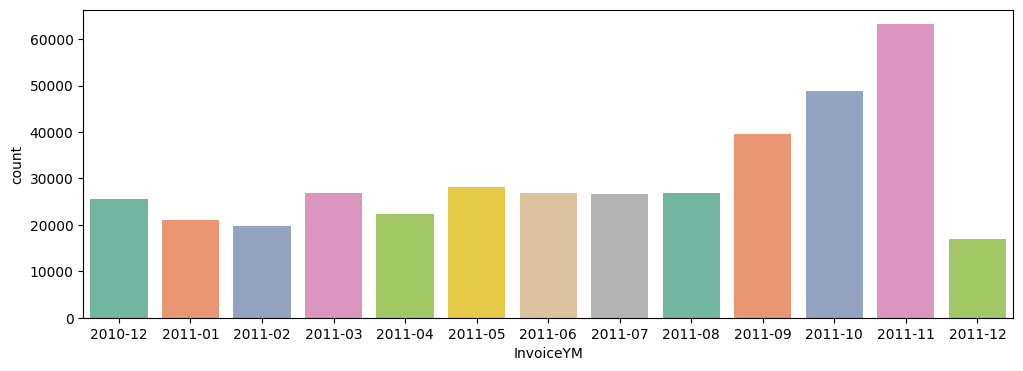

In [47]:
# Visualising number of orders over a period of 1 year
palette = sns.color_palette("Set2", n_colors=df["InvoiceYM"].nunique())
plt.figure(figsize=(12, 4))

sns.countplot(data=df, x="InvoiceYM", hue="InvoiceYM", palette=palette, legend=False)
plt.show()

# Growth in company from Sep 2011. Nov is the best performing month
# Less data for Dec 2011

<Axes: xlabel='InvoiceDow', ylabel='count'>

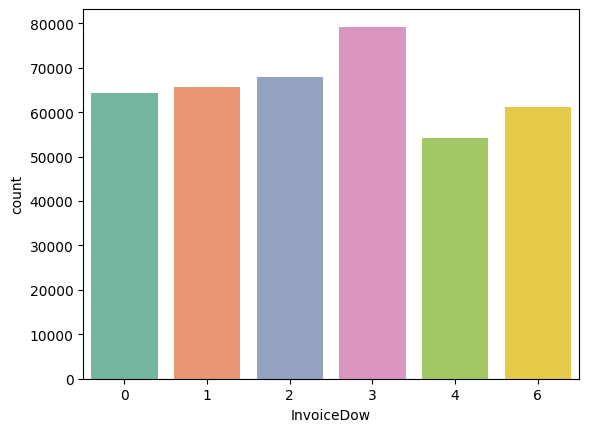

In [48]:
palette = sns.color_palette("Set2", n_colors=df["InvoiceDow"].nunique())

sns.countplot(data=df, x="InvoiceDow", hue="InvoiceDow", palette=palette, legend=False)

0= Monday, 1= Tues, ...
No data for Saturday?

In [50]:
day_name = ["Mon", "Tues", "Wed", "Thu", "Fri", "Sat", "Sun"]
day_name.remove("Sat")
dow_count= df["InvoiceDow"].value_counts().sort_index()
dow_count.index= day_name
dow_count

Mon     64237
Tues    65747
Wed     68043
Thu     79260
Fri     54231
Sun     61214
Name: count, dtype: int64

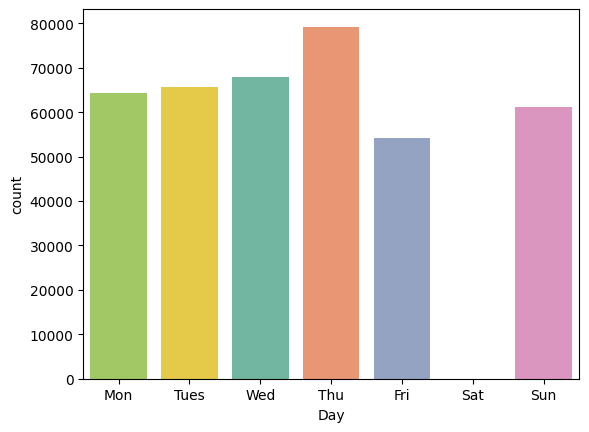

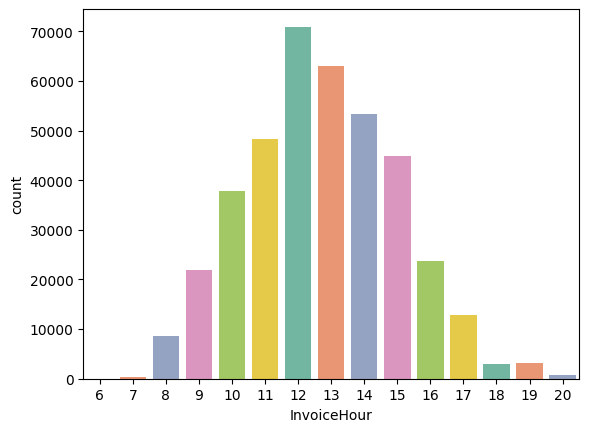

In [51]:
# Visualising number of orders on weekdays and hourly
day_name = ["Mon", "Tues", "Wed", "Thu", "Fri", "Sat", "Sun"]
df["Day"] = df["InvoiceDow"].map(lambda x: day_name[x])

sns.countplot(data=df, x="Day", hue="Day", palette=palette, order=day_name, dodge=False)
plt.legend([], [], frameon=False)  
plt.show()

sns.countplot(data=df, x="InvoiceHour", palette=palette)
plt.show()

Lots of orders on Thursday at around 12 and 1pm.

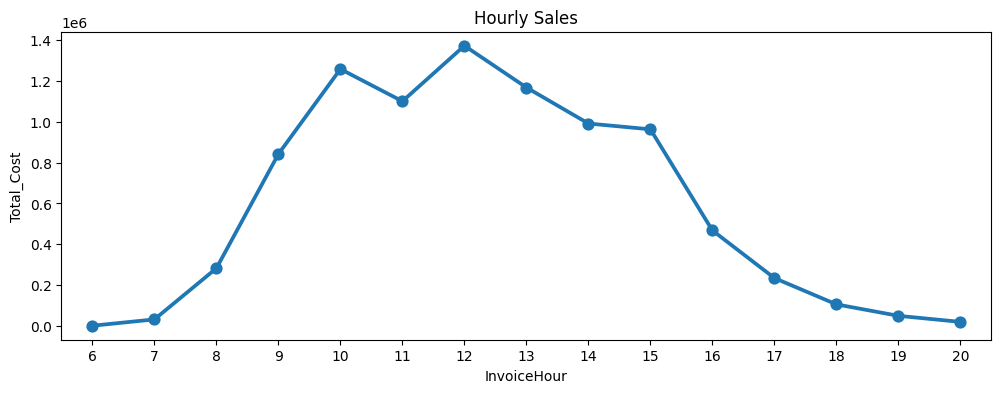

In [53]:
#Visuallising hourly sales 
# When there are lot of orders, the total income also increases
# High sales during 10  and 1 pm
plt.figure(figsize=(12, 4))
sns.pointplot(data=df, x="InvoiceHour", y="Total_Cost", estimator="sum", errorbar=None).set_title("Hourly Sales")
plt.show()


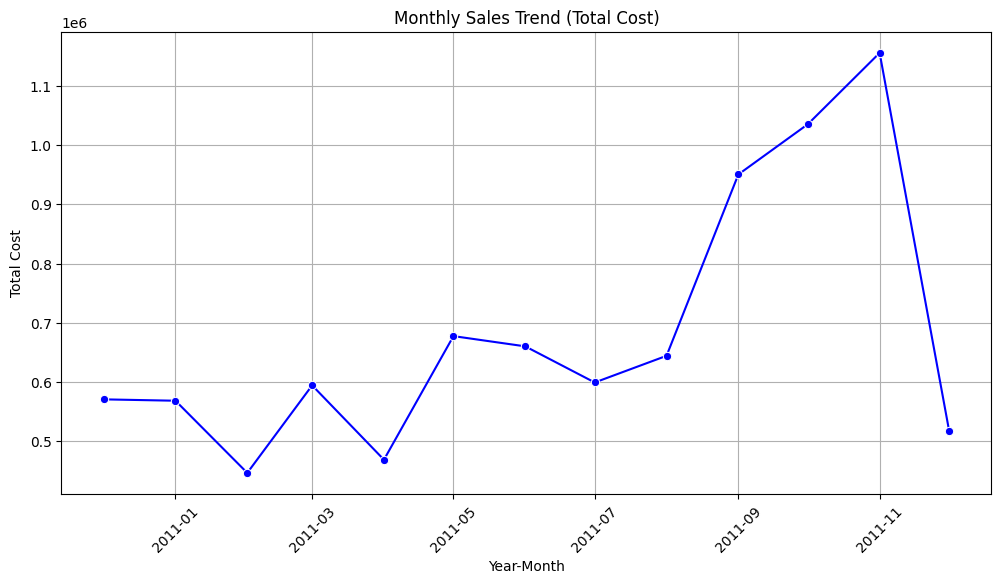

In [54]:
# Aggregate monthly sales by summing Total_Cost for each month
monthly_sales = df.groupby('InvoiceYM')['Total_Cost'].sum().reset_index()

# Convert 'InvoiceYM' to datetime format to ensure proper plotting on the x-axis
monthly_sales['InvoiceYM'] = pd.to_datetime(monthly_sales['InvoiceYM'], format='%Y-%m')

# Plot the monthly sales trend with Total_Cost as y-axis
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='InvoiceYM', y='Total_Cost', marker='o', color='blue')
plt.title("Monthly Sales Trend (Total Cost)")
plt.xlabel("Year-Month")
plt.ylabel("Total Cost")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Feature Engineering

In [56]:
# RFM Analysis
# Select and Create a new dataframe for rfm analysis
df_valid =df[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice','Total_Cost']]
df_valid.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,Total_Cost
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


In [57]:
# Maximum and mininum timestamp in rfm dataset.
df_valid['InvoiceDate'].min(),df_valid['InvoiceDate'].max()

PRESENT = dt.datetime(2011,12,10)
df_valid['InvoiceDate'] = pd.to_datetime(df_valid['InvoiceDate'])

In [58]:
#creating  dataframe for Recency ,Frequency, Monetary as 'rfm'
rfm= df_valid.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Total_Cost': lambda price: price.sum()})

In [59]:
rfm.columns

Index(['InvoiceDate', 'InvoiceNo', 'Total_Cost'], dtype='object')

In [60]:
# Rename the columns
rfm.columns=['Recency','Frequency','MonetaryValue']  
rfm.columns = ['Recency', 'Frequency', 'MonetaryValue']
rfm['Recency'] = rfm['Recency'].astype(int)
#resetting index of dataframe
rfm.reset_index(inplace = True)
rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [61]:
rfm.describe()

,CustomerID,Recency,Frequency,MonetaryValue
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,92.041484,90.512100,2048.215924
std,1721.889758,100.007757,225.515328,8984.248352
min,12346.000000,0.000000,1.000000,0.000000
25%,13812.500000,17.000000,17.000000,306.455000
50%,15299.000000,50.000000,41.000000,668.560000
75%,16778.500000,141.500000,98.000000,1660.315000
max,18287.000000,373.000000,7676.000000,280206.020000


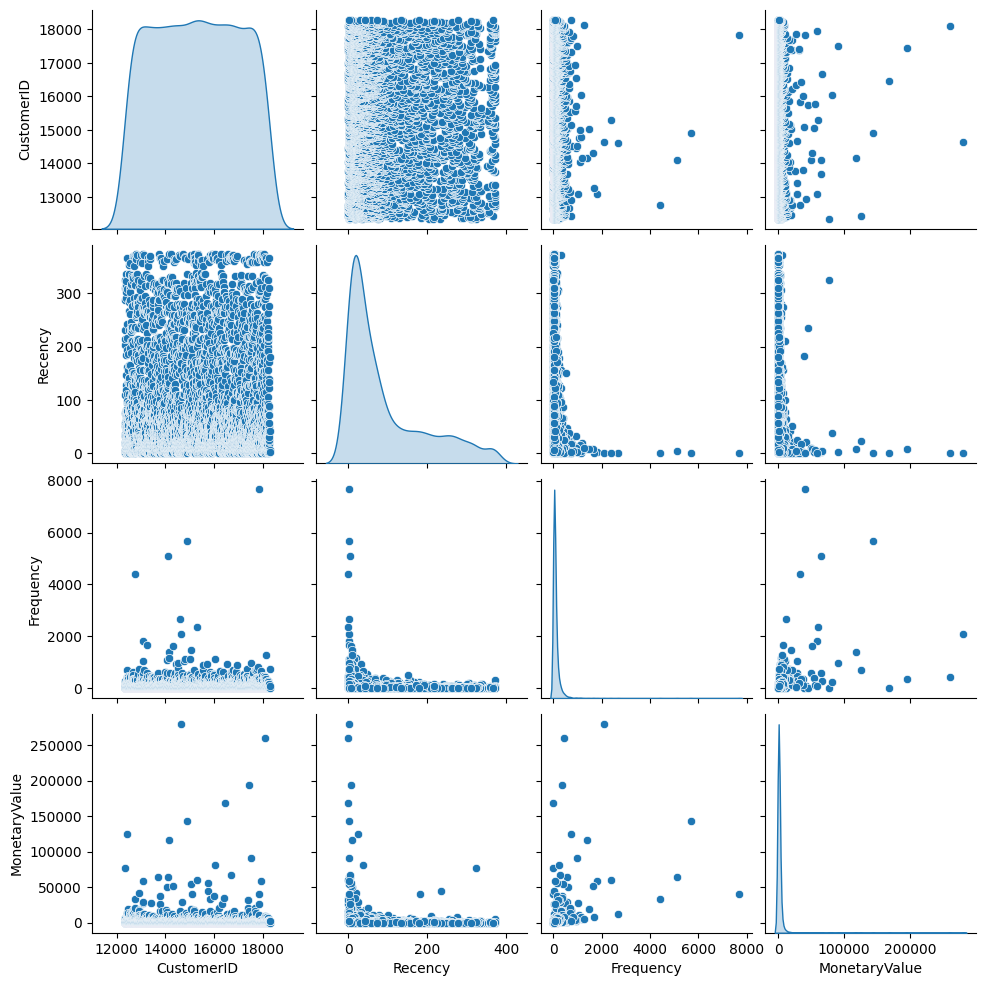

In [62]:
# Visualise distribution of Recency, Frequency and Monetary Value
sns.pairplot(rfm, diag_kind='kde');

I can see that the distribution of 3 variables: Recency, Frequency, Monetary value are skewed. Normalisation is required. 

In [64]:
print(rfm.columns)

Index(['CustomerID', 'Recency', 'Frequency', 'MonetaryValue'], dtype='object')


In [65]:
# Data Normalisation with log
rfm_r_log = np.log(rfm['Recency'] + 0.1)
rfm_f_log = np.log(rfm['Frequency'])
rfm_m_log = np.log(rfm['MonetaryValue'] + 0.1)

log_data = pd.DataFrame({
    'CustomerID': rfm['CustomerID'],  # CustomerID 추가
    'Monetary': rfm_m_log,
    'Recency': rfm_r_log,
    'Frequency': rfm_f_log
})


log_data.head()

,CustomerID,Monetary,Recency,Frequency
0,12346.0,11.253944,5.784133,0.000000
1,12347.0,8.368716,0.741937,5.204007
2,12348.0,7.494063,4.318821,3.433987
3,12349.0,7.471733,2.895912,4.290459
4,12350.0,5.812637,5.736895,2.833213


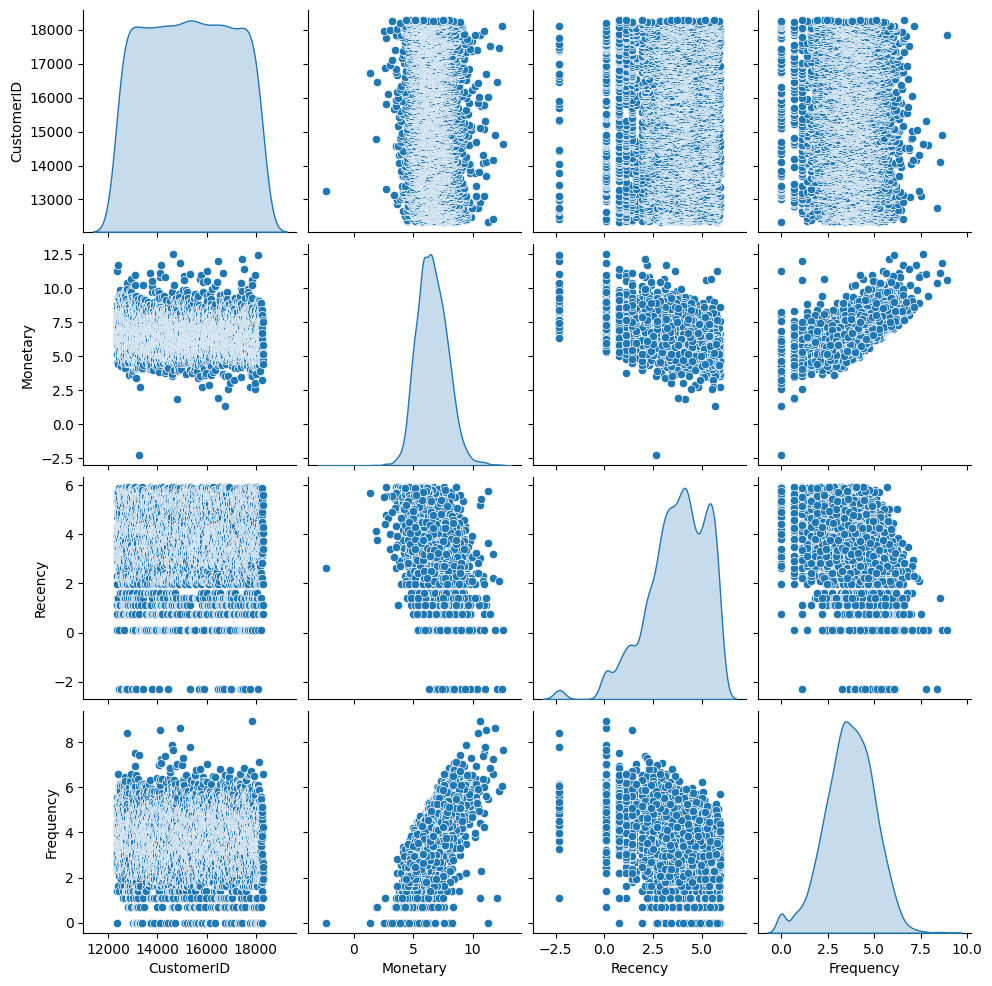

In [66]:
# Distribution of Recency, Frequency and MonetaryValue after Data Normalisation
sns.pairplot(data=log_data, diag_kind='kde');

<Axes: >

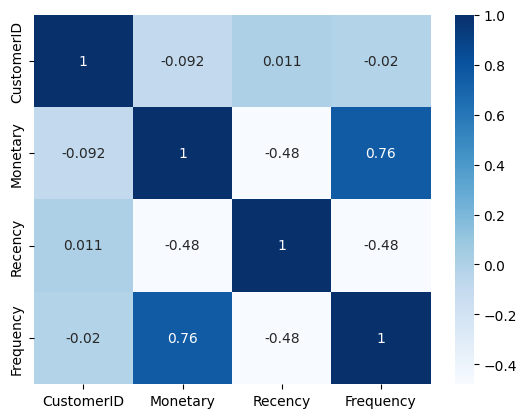

In [67]:
# Correlation Heatmap
sns.heatmap(log_data.corr(), annot= True, cmap='Blues')

Monetary and Frequency show high correlation of 0.76

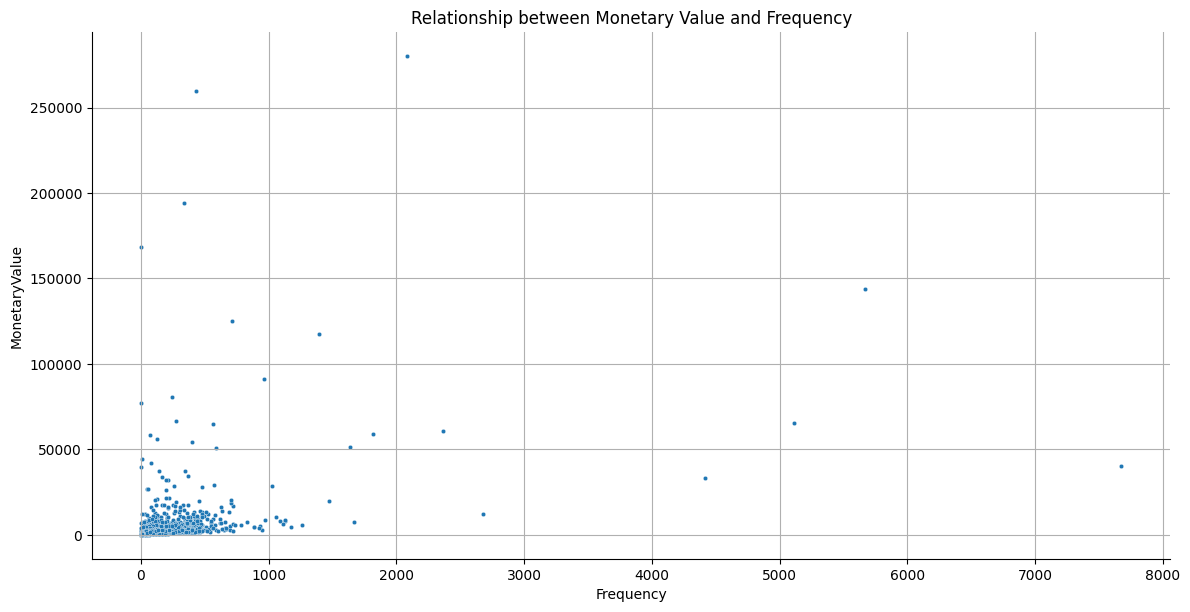

In [69]:
#plotting relationship between monetory and frequency
# Scatter plot
sns.relplot(x="Frequency", y="MonetaryValue", kind="scatter", data=rfm, s=10, height=6, aspect=2)
plt.grid(True)
plt.title("Relationship between Monetary Value and Frequency")
plt.show()


Majority of monetaryvalue doesn't go beyond frequency of 800

In [71]:
# Step 1: Apply quantile-based scoring with qcut
rfm['R_score'] = pd.qcut(rfm['Recency'], 4, labels=False)
rfm['F_score'] = pd.qcut(rfm['Frequency'], 4, labels=False)
rfm['M_score'] = pd.qcut(rfm['MonetaryValue'], 4, labels=False)

# Step 2: Adjust the Recency score so that lower recency (more recent) gets a higher score
# Since labels=False starts from 0, we use (3 - R_score) to flip the scores
rfm['R_score'] = 3 - rfm['R_score']  # Now 3 is the best score for most recent

# Step 3: Combine RFM scores into a single string to create the RFM segment
rfm['RFM'] = rfm['R_score'].astype(str) \
                        + rfm['F_score'].astype(str) \
                        + rfm['M_score'].astype(str)

# Step 4: Calculate the final RFM Score by adding individual scores
rfm["RFM_Score"] = rfm['R_score'] + rfm['F_score'] + rfm['M_score']

# Display the first few rows to verify
rfm[['CustomerID', 'Recency', 'Frequency', 'MonetaryValue', 'R_score', 'F_score', 'M_score', 'RFM', 'RFM_Score']].head(10)


,CustomerID,Recency,Frequency,MonetaryValue,R_score,F_score,M_score,RFM,RFM_Score
0,12346.0,325,1,77183.60,0,0,3,003,3
1,12347.0,2,182,4310.00,3,3,3,333,9
2,12348.0,75,31,1797.24,1,1,3,113,5
3,12349.0,18,73,1757.55,2,2,3,223,7
4,12350.0,310,17,334.40,0,0,1,001,1
5,12352.0,36,85,2506.04,2,2,3,223,7
6,12353.0,204,4,89.00,0,0,0,000,0
7,12354.0,232,58,1079.40,0,2,2,022,4
8,12355.0,214,13,459.40,0,0,1,001,1
9,12356.0,22,59,2811.43,2,2,3,223,7


In [72]:
# Group RFM scores to check the mean values of R, F, M corresponding to each score.
rfm_summary= rfm.groupby("RFM_Score")[['Recency', 'Frequency', 'MonetaryValue']].mean()
rfm_summary

,Recency,Frequency,MonetaryValue
RFM_Score,,,
0,260.244094,8.199475,157.415433
1,176.017903,13.649616,239.581688
2,151.905588,21.109827,366.773470
3,95.069414,27.937093,818.224557
4,79.575492,38.159737,762.014705
5,63.215686,56.154684,987.304989
6,45.587805,78.912195,1804.515615
7,31.992991,110.911215,2065.243995
8,20.617949,187.241026,4050.340974


Low RFM_Score= Highest Recency and lowest Frequency, MonetaryValue
High RFM_SCore= Lowest Recency and highest Frequency, MonetaryValue

In [74]:
# Define descriptive labels based on RFM values
labels = []
for i, row in rfm_summary.iterrows():
    if row['MonetaryValue'] > 5000 and row['Frequency'] > 100:
        labels.append("Top Spenders")
    elif row['MonetaryValue'] > 2000 and row['Frequency'] > 50:
        labels.append("Loyal Big Spenders")
    elif row['MonetaryValue'] > 1000 and row['Frequency'] > 30:
        labels.append("High-Value Loyal Customers")
    elif row['MonetaryValue'] > 500 and row['Frequency'] > 10:
        labels.append("Frequent Buyers")
    elif row['Recency'] < 50 and row['Frequency'] > 5:
        labels.append("Recently Active")
    elif row['Recency'] > 200 and row['Frequency'] < 10:
        labels.append("Occasional Buyers")
    else:
        labels.append("Price-Sensitive or Inactive")

# Add labels to the summary table
rfm_summary['CustomerSegment'] = labels

# Display the labeled RFM summary
rfm_summary

,Recency,Frequency,MonetaryValue,CustomerSegment
RFM_Score,,,,
0,260.244094,8.199475,157.415433,Occasional Buyers
1,176.017903,13.649616,239.581688,Price-Sensitive or Inactive
2,151.905588,21.109827,366.773470,Price-Sensitive or Inactive
3,95.069414,27.937093,818.224557,Frequent Buyers
4,79.575492,38.159737,762.014705,Frequent Buyers
5,63.215686,56.154684,987.304989,Frequent Buyers
6,45.587805,78.912195,1804.515615,High-Value Loyal Customers
7,31.992991,110.911215,2065.243995,Loyal Big Spenders
8,20.617949,187.241026,4050.340974,Loyal Big Spenders


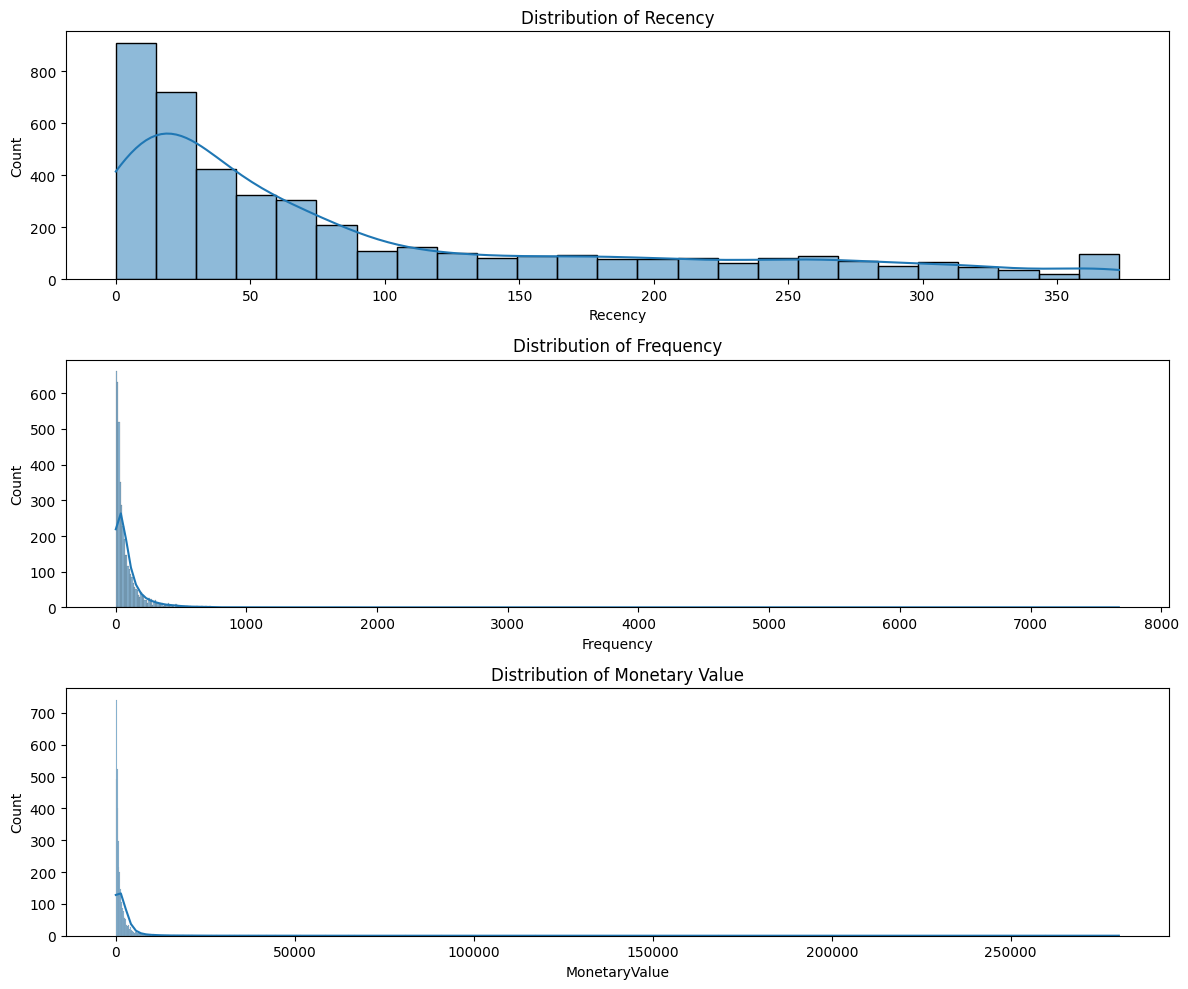

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))

# Plot distribution of original Recency
plt.subplot(3, 1, 1)
sns.histplot(rfm['Recency'], kde=True)
plt.title('Distribution of Recency')

# Plot distribution of original Frequency
plt.subplot(3, 1, 2)
sns.histplot(rfm['Frequency'], kde=True)
plt.title('Distribution of Frequency')

# Plot distribution of original Monetary Value
plt.subplot(3, 1, 3)
sns.histplot(rfm['MonetaryValue'], kde=True)
plt.title('Distribution of Monetary Value')

plt.tight_layout()
plt.show()


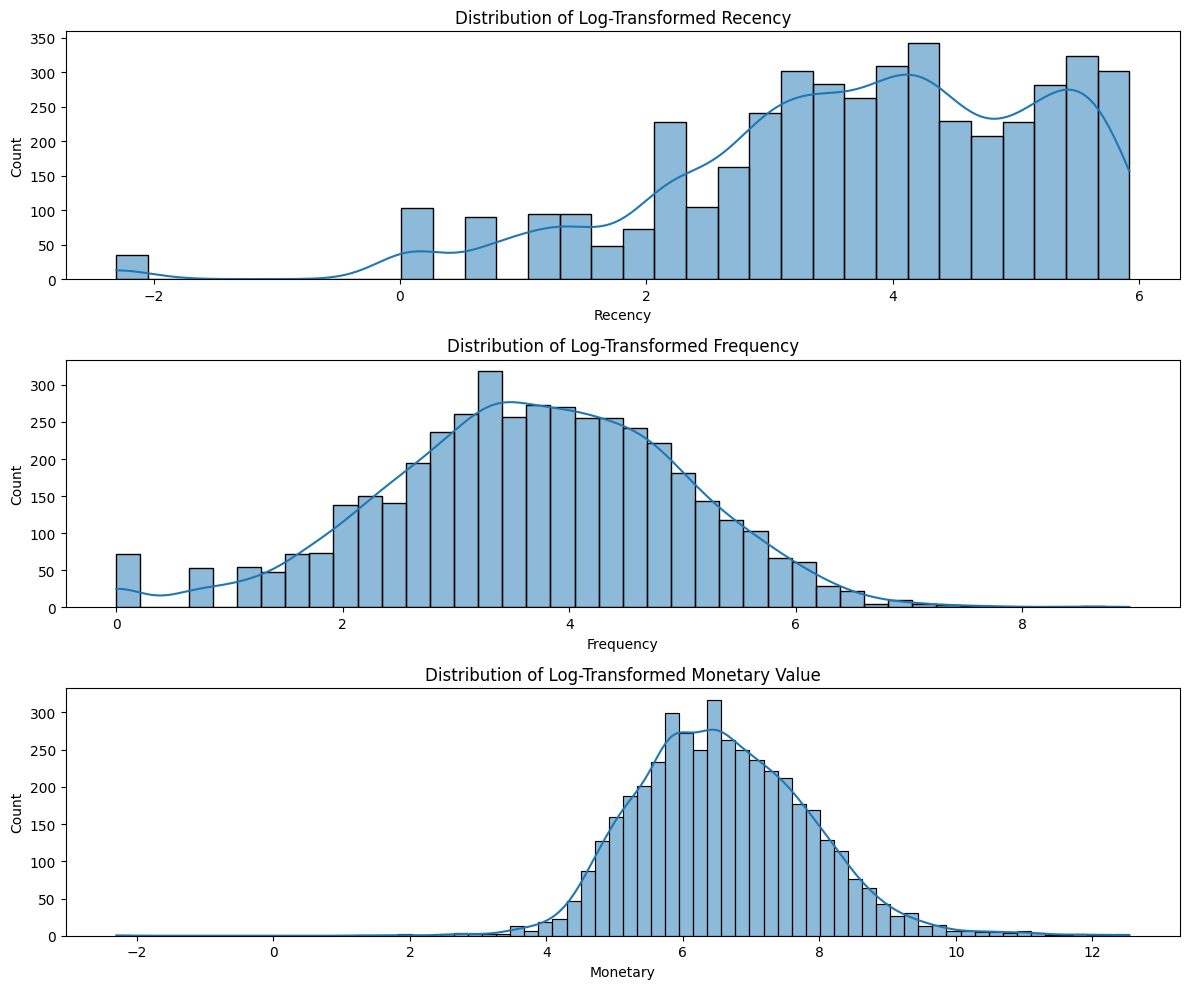

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Checking the distribution of log-transformed Recency, Frequency, and MonetaryValue variables
plt.figure(figsize=(12, 10))

# Plot distribution of log-transformed Recency
plt.subplot(3, 1, 1)
sns.histplot(log_data['Recency'], kde=True)
plt.title('Distribution of Log-Transformed Recency')

# Plot distribution of log-transformed Frequency
plt.subplot(3, 1, 2)
sns.histplot(log_data['Frequency'], kde=True)
plt.title('Distribution of Log-Transformed Frequency')

# Plot distribution of log-transformed MonetaryValue
plt.subplot(3, 1, 3)
sns.histplot(log_data['Monetary'], kde=True)
plt.title('Distribution of Log-Transformed Monetary Value')

plt.tight_layout()
plt.show()


# K-means

In [78]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Selecting the log-transformed features 'Recency', 'Frequency', and 'MonetaryValue' for clustering
features = ['Recency', 'Frequency', 'Monetary']  # Adjust names if needed
X_features = log_data[features].values  # Use log-transformed data

# Preprocessing (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)
X = X_scaled

# Define the range of clusters to evaluate
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# Iterate over each cluster count and compute the silhouette score
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    # Calculate the silhouette score for the current number of clusters
    score = silhouette_score(X, preds)
    print(f"For n_clusters = {n_clusters}, silhouette score is {score}")


For n_clusters = 2, silhouette score is 0.39477753568253127
For n_clusters = 3, silhouette score is 0.3055590991793267
For n_clusters = 4, silhouette score is 0.29426398155376393
For n_clusters = 5, silhouette score is 0.2763919974574475
For n_clusters = 6, silhouette score is 0.2584918467778573
For n_clusters = 7, silhouette score is 0.26792694721447674
For n_clusters = 8, silhouette score is 0.2544856344774955
For n_clusters = 9, silhouette score is 0.25251937823744836
For n_clusters = 10, silhouette score is 0.2586295427208285
For n_clusters = 11, silhouette score is 0.26874182316758566
For n_clusters = 12, silhouette score is 0.245528060788795
For n_clusters = 13, silhouette score is 0.24911173798813457
For n_clusters = 14, silhouette score is 0.2544427476141793
For n_clusters = 15, silhouette score is 0.2549955491492948


Highest silhouette score show for 2 clusters. Although k = 2 has the highest score, it may not provide meaningful segmentation for customer behavior if only two groups are formed. 

## Elbow Method

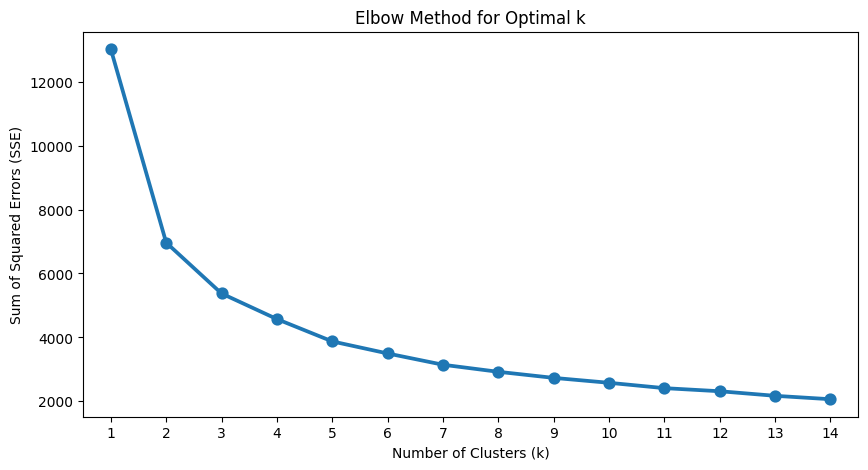

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Dictionary to store Sum of Squared Errors (SSE) for each k
sse = {}

# Fit KMeans and calculate SSE for each k in the specified range
for k in range(1, 15):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=1)
    km = km.fit(X)  # X should be the normalized dataset
    sse[k] = km.inertia_  # Inertia is the sum of squared errors for each k

# Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(10, 5))
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()


Considering both the elbow plot and the silhouette scores, k = 3 seems to be a balanced choice, providing:

- A noticeable elbow in the plot.
- A reasonable silhouette score (0.3056), which, while lower than k=2, allows for a more nuanced segmentatio
Optimal number of cluster should be 3. Use 3 clusters for K-means clustering.

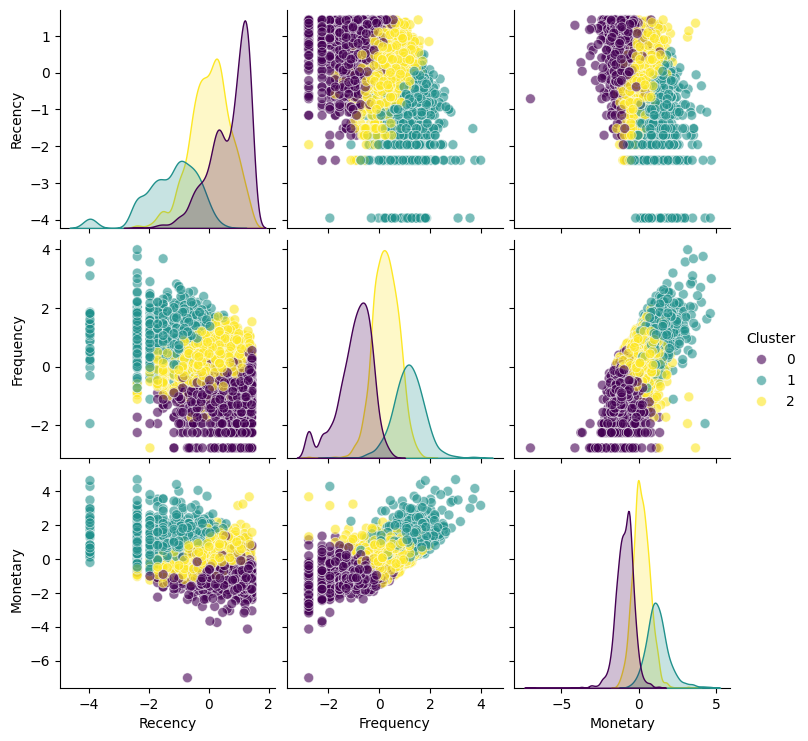

In [83]:

# Step 1: Run KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=1)  # Adjust the number of clusters if necessary
y_kmeans = kmeans.fit_predict(X)  # X is your scaled data

# Step 2: Create a DataFrame with the original data and cluster labels
df_with_clusters = pd.DataFrame(X, columns=['Recency', 'Frequency', 'Monetary'])  # Rename columns based on your features
df_with_clusters['Cluster'] = y_kmeans

# Step 3: Plot pairplot to visualize clusters
sns.pairplot(df_with_clusters, hue='Cluster', palette='viridis', plot_kws={'alpha': 0.6, 's': 50})
plt.show()

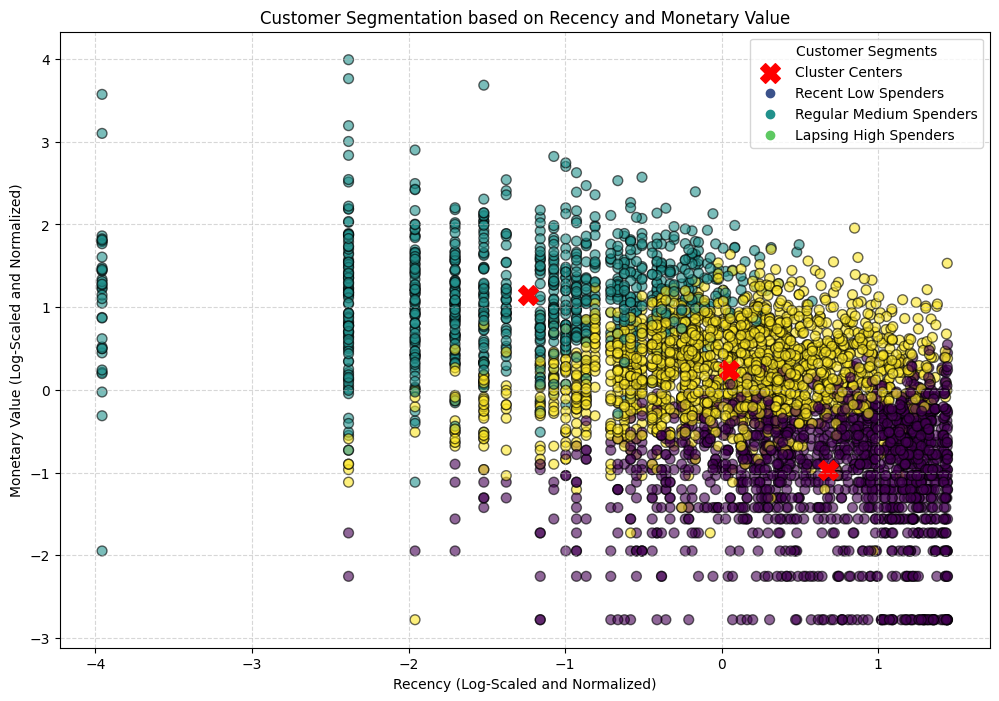

In [84]:
import matplotlib.pyplot as plt

# Plotting segmentation based on Recency and Monetary Value
plt.figure(figsize=(12, 8))
plt.title('Customer Segmentation based on Recency and Monetary Value')

# Scatter plot with labels for each cluster
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.6, edgecolor='k')

# Mark cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')

# Set axis labels
plt.xlabel('Recency (Log-Scaled and Normalized)')
plt.ylabel('Monetary Value (Log-Scaled and Normalized)')

# Custom legend for clusters
legend_labels = {
    0: "Recent Low Spenders",
    1: "Regular Medium Spenders",
    2: "Lapsing High Spenders"
}

# Adding manual legend for each color
for cluster_num, label in legend_labels.items():
    plt.scatter([], [], c=sns.color_palette('viridis', 3)[cluster_num], label=label)

plt.legend(title='Customer Segments')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


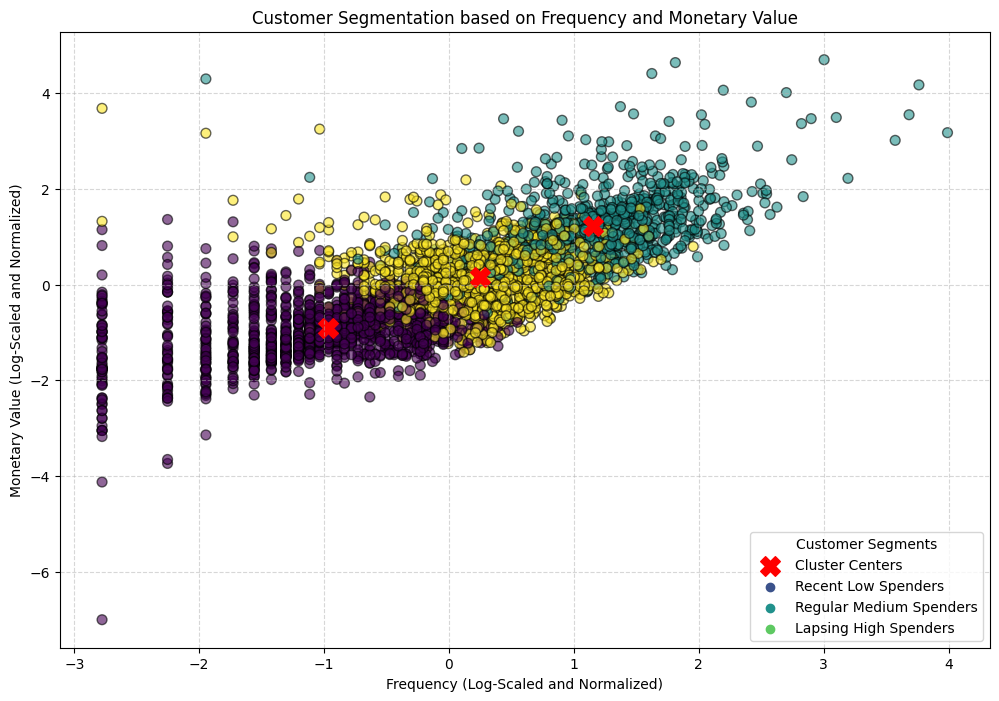

In [85]:

# Plotting segmentation based on Frequency and Monetary Value
plt.figure(figsize=(12, 8))
plt.title('Customer Segmentation based on Frequency and Monetary Value')

# Scatter plot of data points colored by cluster label
plt.scatter(X[:, 1], X[:, 2], c=y_kmeans, s=50, cmap='viridis', alpha=0.6, edgecolor='k')

# Mark cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='red', s=200, marker='X', label='Cluster Centers')

# Set axis labels
plt.xlabel('Frequency (Log-Scaled and Normalized)')
plt.ylabel('Monetary Value (Log-Scaled and Normalized)')

# Custom legend for each cluster
legend_labels = {
    0: "Recent Low Spenders",
    1: "Regular Medium Spenders",
    2: "Lapsing High Spenders"
}

# Adding manual legend for each color
for cluster_num, label in legend_labels.items():
    plt.scatter([], [], c=sns.color_palette('viridis', 3)[cluster_num], label=label)

plt.legend(title='Customer Segments')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [86]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import numpy as np

# Fit the clustering model
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
labels = kmeans.fit_predict(X)

# Calculate the Davies-Bouldin Index
dbi_score = davies_bouldin_score(X, labels)
print(f"Davies-Bouldin Index: {dbi_score}")


Davies-Bouldin Index: 1.0858476834888753


## Hierarchical Clustering

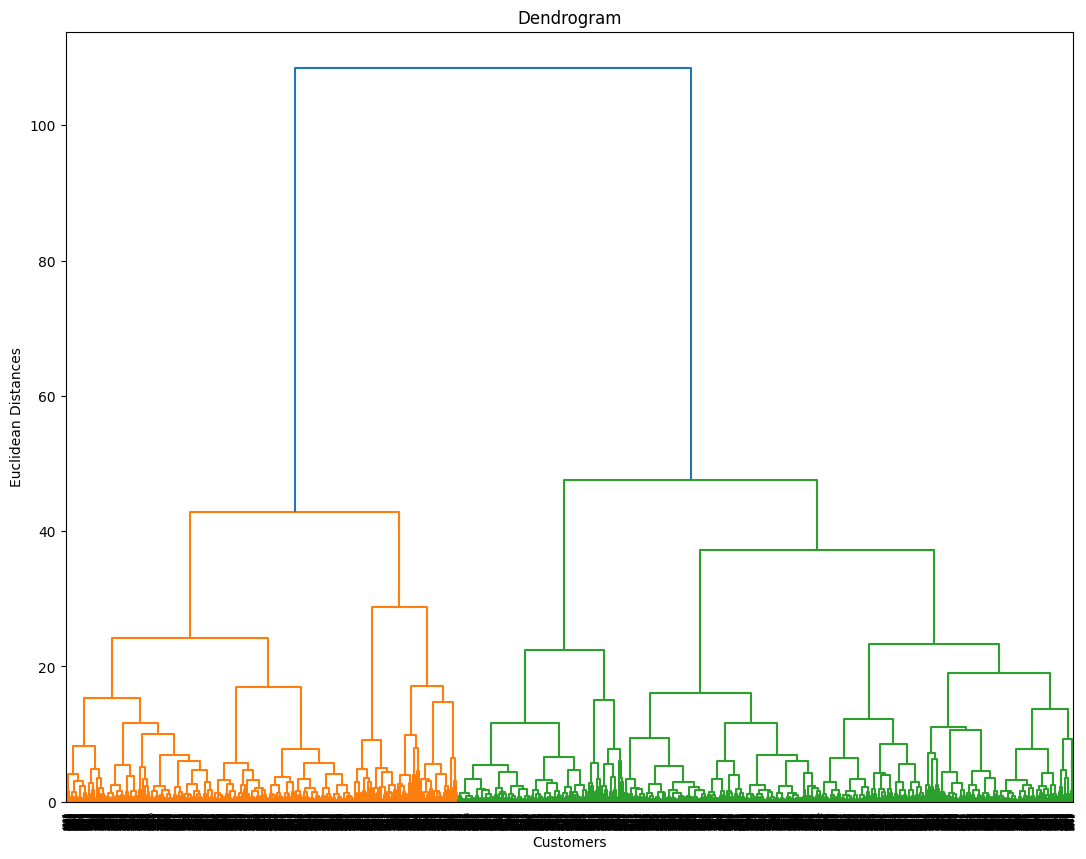

In [88]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Plotting the dendrogram for hierarchical clustering
plt.figure(figsize=(13, 10))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()


 Large vertical distances indicate substantial differences between clusters. a cut around three clusters seems appropriate, as there’s a large vertical gap between the clusters.

In [90]:
from sklearn.cluster import AgglomerativeClustering

# Fitting Agglomerative Clustering with 3 clusters
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)  # X should contain the features used for clustering

# Display a sample of the data with the cluster labels
rfm['Cluster'] = y_hc  # Assuming 'rfm' is your main DataFrame
print(rfm[['CustomerID', 'Recency', 'Frequency', 'MonetaryValue', 'Cluster']].head())


   CustomerID  Recency  Frequency  MonetaryValue  Cluster
0     12346.0      325          1       77183.60        1
1     12347.0        2        182        4310.00        0
2     12348.0       75         31        1797.24        1
3     12349.0       18         73        1757.55        0
4     12350.0      310         17         334.40        2


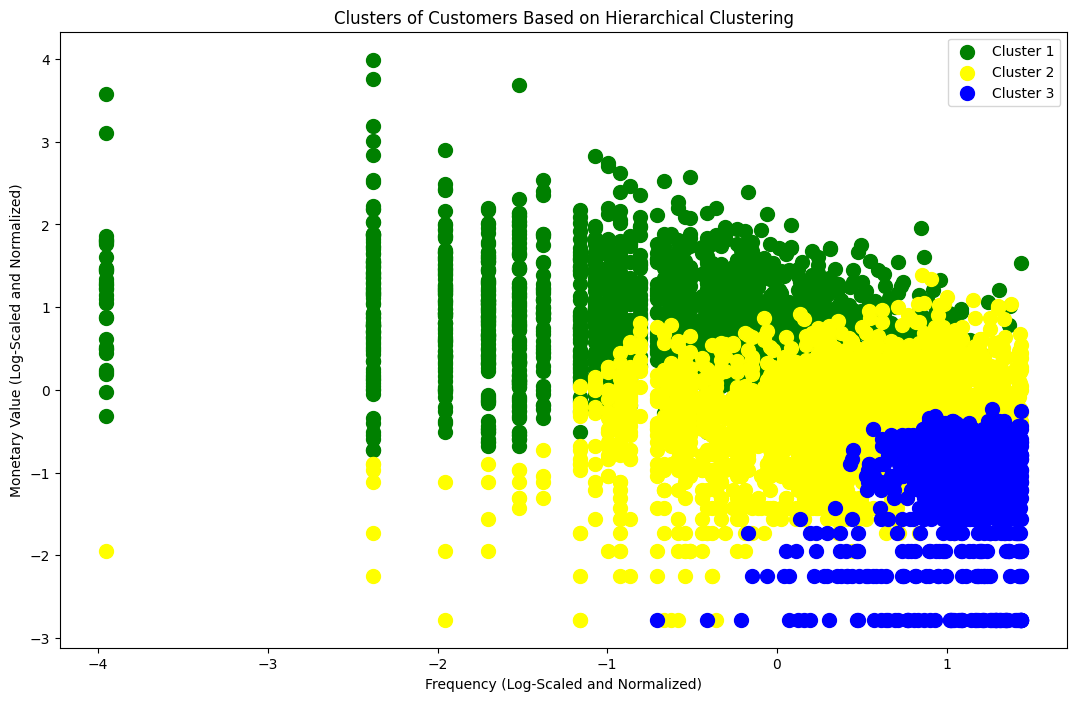

In [91]:
import matplotlib.pyplot as plt

# Visualizing the clusters in two dimensions (e.g., using the first two features of X)
plt.figure(figsize=(13, 8))

# Scatter plot for each cluster with custom colors and labels
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='green', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='yellow', label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='blue', label='Cluster 3')

# Customize plot labels and title
plt.title('Clusters of Customers Based on Hierarchical Clustering')
plt.xlabel('Frequency (Log-Scaled and Normalized)')
plt.ylabel('Monetary Value (Log-Scaled and Normalized)')
plt.legend()

plt.show()


Silhouette Score for 2 clusters: 0.3875
Silhouette Score for 3 clusters: 0.2591
Silhouette Score for 4 clusters: 0.2425
Silhouette Score for 5 clusters: 0.2398
Silhouette Score for 6 clusters: 0.2323
Silhouette Score for 7 clusters: 0.1978
Silhouette Score for 8 clusters: 0.1924
Silhouette Score for 9 clusters: 0.1926
Silhouette Score for 10 clusters: 0.2013


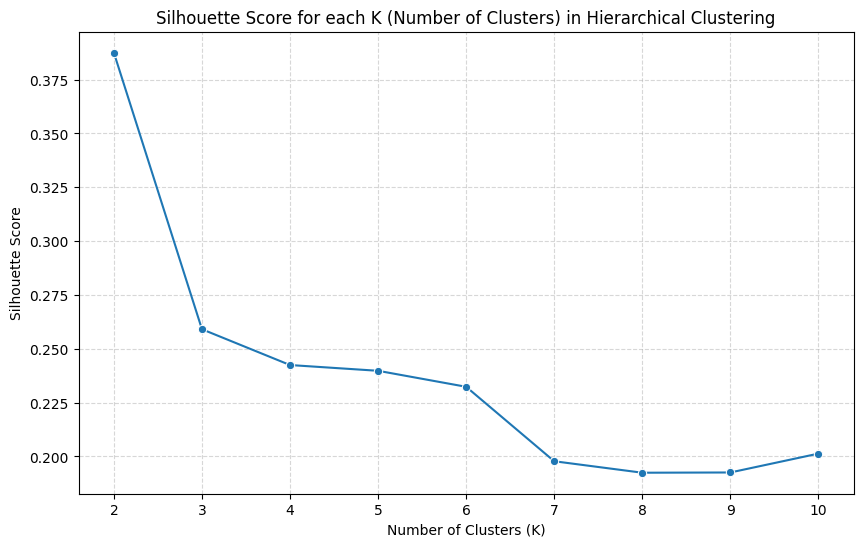


The best number of clusters is 2 with a silhouette score of 0.3875


In [92]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Range of clusters to test
cluster_range = range(2, 11)
silhouette_scores = []

# Loop over the range and calculate silhouette score for each k
for k in cluster_range:
    agglom = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    cluster_labels = agglom.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for {k} clusters: {silhouette_avg:.4f}")

# Plotting silhouette scores for each k
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(cluster_range), y=silhouette_scores, marker='o')
plt.title('Silhouette Score for each K (Number of Clusters) in Hierarchical Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Identify the best number of clusters
best_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\nThe best number of clusters is {best_k} with a silhouette score of {max(silhouette_scores):.4f}")


In [93]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score

# Perform hierarchical clustering with AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=3)  # Specify n_clusters as needed
labels = hierarchical.fit_predict(X)

# Calculate the Davies-Bouldin Index
dbi_score = davies_bouldin_score(X, labels)
print(f"Davies-Bouldin Index for Hierarchical Clustering: {dbi_score}")


Davies-Bouldin Index for Hierarchical Clustering: 1.173060898090833


# DBSCAN

In [95]:
pip install hdbscan

Note: you may need to restart the kernel to use updated packages.


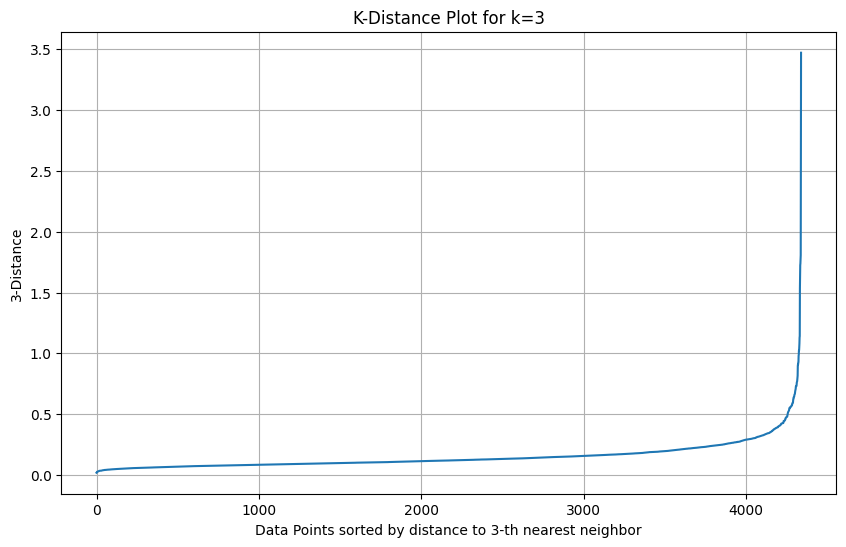

In [96]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Function to plot the k-distance graph
def plot_k_distance(X, k):
    # Compute the k-nearest neighbors
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(X)
    
    # Calculate the distances to the k-th nearest neighbor
    distances, indices = neighbors_fit.kneighbors(X)
    k_distances = np.sort(distances[:, k-1])  # Sort distances to the k-th nearest neighbor

    # Plot the k-distance graph
    plt.figure(figsize=(10, 6))
    plt.plot(k_distances)
    plt.xlabel(f'Data Points sorted by distance to {k}-th nearest neighbor')
    plt.ylabel(f'{k}-Distance')
    plt.title(f'K-Distance Plot for k={k}')
    plt.grid(True)
    plt.show()


k = 3  

# Assuming X contains the features [Recency, Frequency, Monetary] that are log-scaled and normalized
plot_k_distance(X, k)


eps=0.3, min_samples=3, Clusters=27
eps=0.3, min_samples=5, Clusters=14
eps=0.3, min_samples=10, Clusters=5
eps=0.3, min_samples=15, Clusters=4
eps=0.4, min_samples=3, Clusters=14
eps=0.4, min_samples=5, Clusters=8
eps=0.4, min_samples=10, Clusters=3
Silhouette Score for 3 clusters (eps=0.4, min_samples=10): 0.18743603171610745
eps=0.4, min_samples=15, Clusters=3
Silhouette Score for 3 clusters (eps=0.4, min_samples=15): 0.20160146149948988
eps=0.5, min_samples=3, Clusters=6
eps=0.5, min_samples=5, Clusters=4
eps=0.5, min_samples=10, Clusters=2
eps=0.5, min_samples=15, Clusters=2
eps=0.6000000000000001, min_samples=3, Clusters=4
eps=0.6000000000000001, min_samples=5, Clusters=2
eps=0.6000000000000001, min_samples=10, Clusters=2
eps=0.6000000000000001, min_samples=15, Clusters=1
eps=0.7000000000000002, min_samples=3, Clusters=3
Silhouette Score for 3 clusters (eps=0.7000000000000002, min_samples=3): 0.37319790050979507
eps=0.7000000000000002, min_samples=5, Clusters=2
eps=0.700000000000

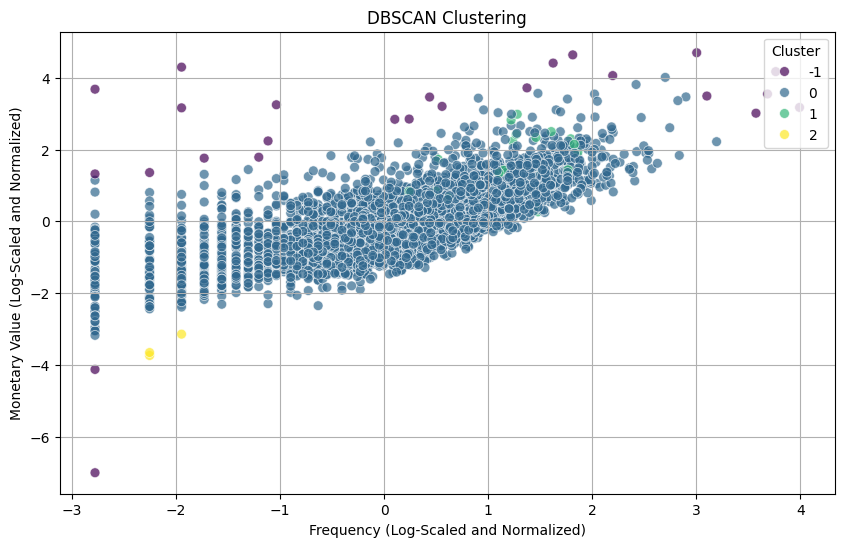

In [97]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# Define a function to experiment with DBSCAN parameters and plot results
def dbscan_clustering(X, eps_values, min_samples_values):
    best_silhouette = -1  # Initialize best silhouette score
    best_params = None
    best_labels = None
    
    # Loop through combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            # Apply DBSCAN
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)
            
            # Count number of unique clusters (excluding noise points)
            n_clusters = len(set(labels) - {-1})  # Excluding noise (-1)
            print(f"eps={eps}, min_samples={min_samples}, Clusters={n_clusters}")

            # If we get exactly 3 clusters, calculate silhouette score (excluding noise)
            if n_clusters == 3:
                silhouette_avg = silhouette_score(X[labels != -1], labels[labels != -1])
                print(f"Silhouette Score for 3 clusters (eps={eps}, min_samples={min_samples}): {silhouette_avg}")

                # Update best parameters if this score is better
                if silhouette_avg > best_silhouette:
                    best_silhouette = silhouette_avg
                    best_params = (eps, min_samples)
                    best_labels = labels
    
    print("\nBest Parameters:", best_params)
    print("Best Silhouette Score:", best_silhouette)

    # Plot final result with the best parameters
    if best_labels is not None:
        plot_clusters(X, best_labels, best_params[0], best_params[1])

# Define a function to plot the clusters
def plot_clusters(X, labels, eps, min_samples):
    # Adjust the columns based on the number of features in X
    df_with_clusters = pd.DataFrame(X, columns=['Recency', 'Frequency', 'Monetary'])
    df_with_clusters['Cluster'] = labels

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=df_with_clusters, palette='viridis', s=50, alpha=0.7)
    plt.title(f'DBSCAN Clustering')
    plt.xlabel('Frequency (Log-Scaled and Normalized)')
    plt.ylabel('Monetary Value (Log-Scaled and Normalized)')
    plt.legend(title='Cluster', loc='upper right')
    plt.grid(True)
    plt.show()

# Define ranges for eps and min_samples to explore
eps_values = np.arange(0.3, 1.0, 0.1)
min_samples_values = [3, 5, 10, 15]

# Assuming X contains the features [Recency, Frequency, Monetary] that are log-scaled and normalized
dbscan_clustering(X, eps_values, min_samples_values)


In [98]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score
import numpy as np

# Set the DBSCAN parameters (based on k-distance plot or experimentation)
eps = 0.5  # Example value; adjust based on your dataset
min_samples = 5  

# Apply DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X)

# Check if DBSCAN created at least 2 clusters (DBI requires at least 2 clusters to calculate)
if len(set(labels)) > 1 and -1 in labels:
    # Calculate the DBI only for non-noise points (excluding label -1)
    dbi_score = davies_bouldin_score(X[labels != -1], labels[labels != -1])
    print(f"Davies-Bouldin Index for DBSCAN: {dbi_score}")
else:
    print("DBSCAN did not create enough clusters for DBI calculation")


Davies-Bouldin Index for DBSCAN: 0.6298161328099261


# Evaluation 

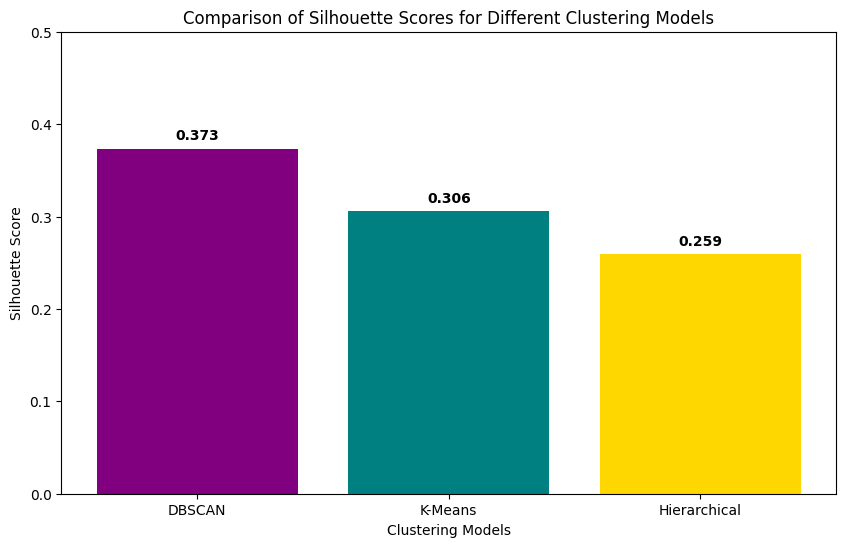

In [100]:
import matplotlib.pyplot as plt

# Silhouette scores for each model based on your provided data
models = ['DBSCAN', 'K-Means', 'Hierarchical']
silhouette_scores = [0.3732, 0.3057, 0.2591]  # Replace these values with actual scores

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, silhouette_scores, color=['purple', 'teal', 'gold'])
plt.xlabel('Clustering Models')
plt.ylabel('Silhouette Score')
plt.title('Comparison of Silhouette Scores for Different Clustering Models')
plt.ylim(0, 0.5)  # Adjust y-axis limit for better visualization
for i, v in enumerate(silhouette_scores):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center', fontweight='bold')
plt.show()


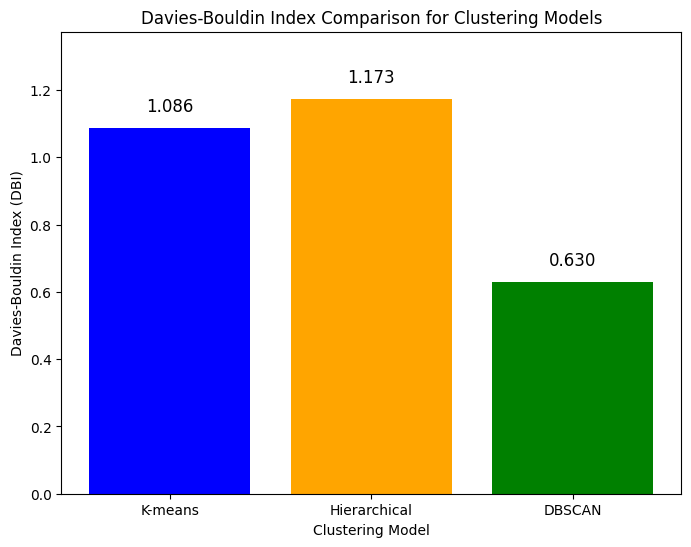

In [101]:
import matplotlib.pyplot as plt

dbi_kmeans = 1.0858476834888753  
dbi_hierarchical = 1.173060898090833  
dbi_dbscan = 0.6298161328099261 

# Model names and their corresponding DBI scores
models = ['K-means', 'Hierarchical', 'DBSCAN']
dbi_scores = [dbi_kmeans, dbi_hierarchical, dbi_dbscan]

# Plotting the DBI scores
plt.figure(figsize=(8, 6))
plt.bar(models, dbi_scores, color=['blue', 'orange', 'green'])
plt.xlabel('Clustering Model')
plt.ylabel('Davies-Bouldin Index (DBI)')
plt.title('Davies-Bouldin Index Comparison for Clustering Models')
plt.ylim(0, max(dbi_scores) + 0.2)  # Adjust y-axis to add space above bars for readability

# Display the DBI values on top of each bar
for i, score in enumerate(dbi_scores):
    plt.text(i, score + 0.05, f"{score:.3f}", ha='center', fontsize=12)

plt.show()
